C:\Users\yuta8\AppData\Local\Temp\ipykernel_14996\4223667093.py:26: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(np.diag(kernel(X, X, length_scale) - k.T.dot(K_inv).dot(k))) #np.diag:行列の対角成分を抽出したり、対角成分を持つ行列を作成したりするために使用される


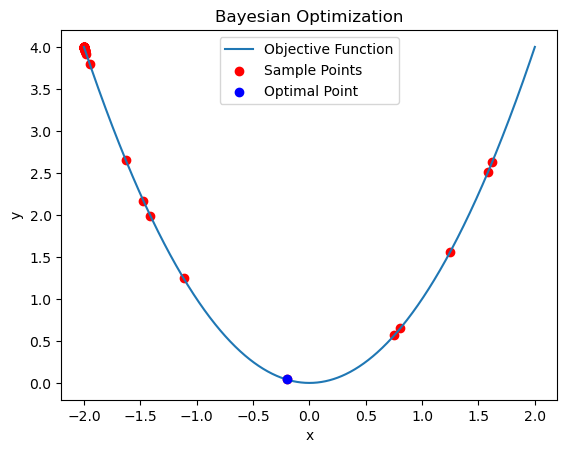

最適化されたパラメータ: x = -0.2029
最小化された関数値: y = 0.0412


'\nn:新しいサンプル点の数\nm:サンプル点の数\nX:新しいサンプル点の集合 n行1列\nX_sample:サンプル点の集合 m行1列\nk:X_sampleとXのカーネル行列 m行n列\nK:X_sampleのカーネル行列 m行m列\nkernel(X, X, length_scale):新しいサンプル点のカーネル行列 n行n列\nsigma:標準偏差のベクトル n\n'

In [48]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def objective_function(x):
    return x**2

# データの可視化
x = np.linspace(-2, 2, 1000)
y = list(map(objective_function, x))

# ガウス（RBF）カーネル
def rbf_kernel(X1, X2, length_scale=1.0):
    X1 = np.atleast_2d(X1) #np.atleast_2d:入力配列を二次元に拡張
    X2 = np.atleast_2d(X2)
    dists = cdist(X1 / length_scale, X2 / length_scale, metric='euclidean') #cdist:2つの二次元配列の各点間の距離行列を計算する
    """
    カーネルはデータポイント間の類似度を示すため, 
    length_scaleが大きいと遠く離れたポイント同士でも類似しているみなす. 小さいとより類似しているポイントのみを類似しているとみなす
    """
    return np.exp(-0.5 * dists**2)

# ガウス過程
def gaussian_process(X, X_sample, Y_sample, kernel, length_scale=1.0, noise=1e-10):
    K = kernel(X_sample, X_sample, length_scale) + noise * np.eye(len(X_sample)) #np.eye:指定されたサイズの単位行列を作成
    K_inv = np.linalg.inv(K) #np.linalg.inv:逆行列をとる
    k = kernel(X_sample, X, length_scale)
    mu = k.T.dot(K_inv).dot(Y_sample)
    sigma = np.sqrt(np.diag(kernel(X, X, length_scale) - k.T.dot(K_inv).dot(k))) #np.diag:行列の対角成分を抽出したり、対角成分を持つ行列を作成したりするために使用される
    return mu, sigma

# 期待改善度（EI）
def expected_improvement(X, X_sample, Y_sample, kernel, length_scale=1.0, xi=0.01):
    mu, sigma = gaussian_process(X, X_sample, Y_sample, kernel, length_scale)
    f_ast = np.min(Y_sample)  # 現在の最小値

    with np.errstate(divide='warn'): #sigam=0のときの処理（これにより, エラーが引き起こされることなく実行される）
        Z = (mu - f_ast - xi) / sigma  #ξ(クシー):探索と活用のバランスを調整する。大きい→探索重視　小さい→活用重視
        ei = (mu - f_ast - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)

    ei[sigma == 0.0] = 0.0

    return ei

# ベイズ最適化
def bayesian_optimization(n_iters, sample_loss, kernel, length_scale=1.0, n_pre_samples=10, xi=0.01):
    X_sample = np.random.uniform(-2, 2, n_pre_samples).reshape(-1, 1) #np.random.uniform:一様分布
    Y_sample = np.array([sample_loss(x) for x in X_sample])

    for n in range(n_iters):
        ei = np.array([expected_improvement(X.reshape(-1, 1), X_sample, Y_sample, kernel, length_scale, xi=xi) for X in x])
        next_sample = x[np.argmax(ei)].reshape(-1, 1)
        Y_next = sample_loss(next_sample)
        X_sample = np.vstack((X_sample, next_sample))
        Y_sample = np.append(Y_sample, Y_next)

    return X_sample, Y_sample

# ベイズ最適化の実行
X_sample, Y_sample = bayesian_optimization(n_iters=50, sample_loss=objective_function, kernel=rbf_kernel, length_scale=0.5, xi=0.01)

# 最適化結果の表示
optimal_idx = np.argmin(Y_sample)
optimal_x = X_sample[optimal_idx]
optimal_y = Y_sample[optimal_idx]

# プロットに最適化された点を追加
plt.plot(x, y, label='Objective Function')  # Plot true data
plt.scatter(X_sample, Y_sample, color='red', label='Sample Points')  # Sample points
plt.scatter(optimal_x, optimal_y, color='blue', label='Optimal Point', zorder=5)  # Optimal point
plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Optimization')
plt.legend()
plt.show()

print("最適化されたパラメータ: x = {:.4f}".format(optimal_x[0]))
print("最小化された関数値: y = {:.4f}".format(optimal_y))


"""
n:新しいサンプル点の数
m:サンプル点の数
X:新しいサンプル点の集合 n行1列
X_sample:サンプル点の集合 m行1列
k:X_sampleとXのカーネル行列 m行n列
K:X_sampleのカーネル行列 m行m列
kernel(X, X, length_scale):新しいサンプル点のカーネル行列 n行n列
sigma:標準偏差のベクトル n
"""

C:\Users\yuta8\AppData\Local\Temp\ipykernel_14996\3110020683.py:22: RuntimeWarning: invalid value encountered in sqrt
  sigma = np.sqrt(np.diag(kernel(X, X, length_scale) - k.T.dot(K_inv).dot(k)))


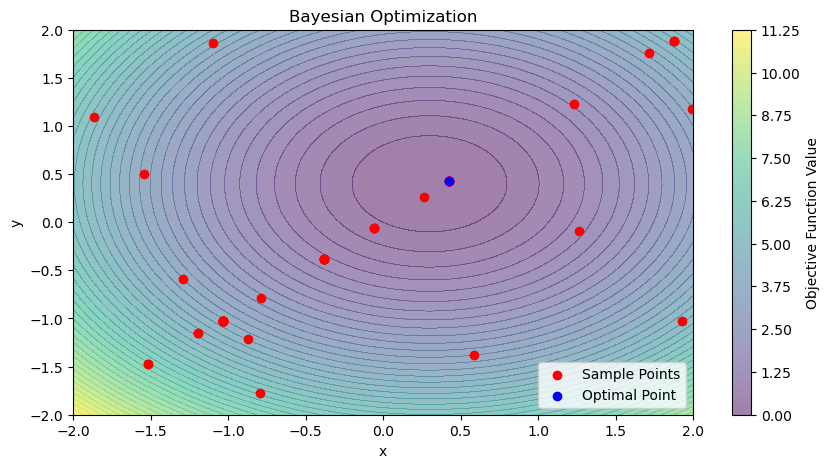

最適化されたパラメータ: x = 0.4242, y = 0.4242
最小化された関数値: y = 0.0160


In [52]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def objective_function(x, y):
    return (x - 0.3)**2 + (y - 0.4)**2

# ガウス（RBF）カーネル
def rbf_kernel(X1, X2, length_scale=1.0):
    X1 = np.atleast_2d(X1)
    X2 = np.atleast_2d(X2)
    dists = cdist(X1 / length_scale, X2 / length_scale, metric='euclidean') 
    return np.exp(-0.5 * dists**2)

# ガウス過程
def gaussian_process(X, X_sample, Y_sample, kernel, length_scale=1.0, noise=1e-10):
    K = kernel(X_sample, X_sample, length_scale) + noise * np.eye(len(X_sample))
    K_inv = np.linalg.inv(K)
    k = kernel(X_sample, X, length_scale)
    mu = k.T.dot(K_inv).dot(Y_sample)
    sigma = np.sqrt(np.diag(kernel(X, X, length_scale) - k.T.dot(K_inv).dot(k)))
    return mu, sigma

# 期待改善度（EI）
def expected_improvement(X, X_sample, Y_sample, kernel, length_scale=1.0, xi=0.01):
    mu, sigma = gaussian_process(X, X_sample, Y_sample, kernel, length_scale)
    f_ast = np.min(Y_sample)  # 現在の最小値

    with np.errstate(divide='warn'):
        Z = (mu - f_ast - xi) / sigma
        ei = (mu - f_ast - xi) * norm.cdf(Z) + sigma * norm.pdf(Z)

    ei[sigma == 0.0] = 0.0

    return ei

# ベイズ最適化
def bayesian_optimization(n_iters, sample_loss, kernel, length_scale=1.0, n_pre_samples=10, xi=0.01):
    # 初期サンプルの生成
    X_sample = np.random.uniform(-2, 2, (n_pre_samples, 2))
    Y_sample = np.array([sample_loss(x[0], x[1]) for x in X_sample])

    for n in range(n_iters):
        # EIを計算
        ei = np.array([expected_improvement(X.reshape(-1, 2), X_sample, Y_sample, kernel, length_scale, xi=xi) for X in np.mgrid[-2:2:100j, -2:2:100j].reshape(-1, 2)])
        next_sample = np.mgrid[-2:2:100j, -2:2:100j].reshape(-1, 2)[np.argmax(ei)] #np.mgrid:メッシュリッド（格子点）の生成, 各行が一つののグリッド点の座標を持つように変換する. つまり, [[-2 -2]...[2 2]]
        Y_next = sample_loss(next_sample[0], next_sample[1])                          #100jにより複素数形式で等間隔な100分割を図る
        X_sample = np.vstack((X_sample, next_sample))
        Y_sample = np.append(Y_sample, Y_next)

    return X_sample, Y_sample

# ベイズ最適化の実行
X_sample, Y_sample = bayesian_optimization(n_iters=50, sample_loss=objective_function, kernel=rbf_kernel, length_scale=0.5, xi=0.01)

# 最適化結果の表示
optimal_idx = np.argmin(Y_sample)
optimal_x = X_sample[optimal_idx]
optimal_y = Y_sample[optimal_idx]

# プロットに最適化された点を追加
plt.figure(figsize=(10, 5))

# Objective functionのヒートマップ
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = objective_function(X, Y)
plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.5)
plt.colorbar(label='Objective Function Value')

# サンプルポイントと最適化された点のプロット
plt.scatter(X_sample[:, 0], X_sample[:, 1], c='red', label='Sample Points')
plt.scatter(optimal_x[0], optimal_x[1], c='blue', label='Optimal Point', zorder=5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Bayesian Optimization')
plt.legend()
plt.show()

print("最適化されたパラメータ: x = {:.4f}, y = {:.4f}".format(optimal_x[0], optimal_x[1]))
print("最小化された関数値: y = {:.4f}".format(optimal_y))
